In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np

dataset_dir = "/content/drive/My Drive/miniproject_daminda_sir/dataset/images"
categories = ["stain", "defect_free"]
image_size = (224, 224)

annotation_dir = os.path.join(dataset_dir, "annotation")
if os.path.exists(annotation_dir):
    for file in os.listdir(annotation_dir):
        os.remove(os.path.join(annotation_dir, file))
    os.rmdir(annotation_dir)
    print("Annotation folder and files removed successfully.")

## Data Exploration
images = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_dir, category)
    label = categories.index(category)
    for img_filename in os.listdir(category_path):
        try:
            img = cv2.imread(os.path.join(category_path, img_filename))
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
        except Exception as e:
            print("Error loading image:", e)

images = np.array(images)
labels = np.array(labels)

num_stain_images = np.sum(labels == 0)
num_defect_free_images = np.sum(labels == 1)
image_dimensions = images.shape[1:]

print("Number of stain images:", num_stain_images)
print("Number of defect-free images:", num_defect_free_images)
print("Image dimensions:", image_dimensions)

# Descriptive Analysis
mean_pixel_value = np.mean(images)#mean
std_pixel_value = np.std(images) #standerd deviation

print("Mean Pixel Value:", mean_pixel_value)
print("Standard Deviation of Pixel Value:", std_pixel_value)

class_distribution = {category: np.sum(labels == categories.index(category)) for category in categories}
print("Class Distribution:", class_distribution)

# 3: Data Preprocessing

# Cleaning (Already done by removing the "annotation" folder)

## Transformation
images = images / 255.0 #(value between 0-1)

# 4: Data Mining

## Predictive Analysis

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)    #x=images/ y=lables

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_dimensions), #rectified linear unit
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')   #(0 an 1) values
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5: Evaluation and Interpretation

## Results
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of stain images: 398
Number of defect-free images: 68
Image dimensions: (224, 224, 3)
Mean Pixel Value: 166.1010763571456
Standard Deviation of Pixel Value: 31.833220850722782
Class Distribution: {'stain': 398, 'defect_free': 68}
Epoch 1/12
12/12 [==============================] - 40s 3s/step - loss: 0.4898 - accuracy: 0.8683 - val_loss: 0.5636 - val_accuracy: 0.7979
Epoch 2/12
12/12 [==============================] - 39s 3s/step - loss: 0.4193 - accuracy: 0.8683 - val_loss: 0.5415 - val_accuracy: 0.7979
Epoch 3/12
12/12 [==============================] - 36s 3s/step - loss: 0.3901 - accuracy: 0.8683 - val_loss: 0.4941 - val_accuracy: 0.7979
Epoch 4/12
12/12 [==============================] - 38s 3s/step - loss: 0.3935 - accuracy: 0.8683 - val_loss: 0.5200 - val_accuracy: 0.7979
Epoch 5/12
12/12 [==============================] - 36s 3s/step - loss: 0.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of stain images: 398
Number of defect-free images: 68
Image dimensions: (224, 224, 3)
Mean Pixel Value: 166.1010763571456
Standard Deviation of Pixel Value: 31.833220850722782
Class Distribution: {'stain': 398, 'defect_free': 68}
Epoch 1/12
12/12 [==============================] - 38s 3s/step - loss: 0.5506 - accuracy: 0.8683 - val_loss: 0.5204 - val_accuracy: 0.7979
Epoch 2/12
12/12 [==============================] - 35s 3s/step - loss: 0.3969 - accuracy: 0.8683 - val_loss: 0.4967 - val_accuracy: 0.7979
Epoch 3/12
12/12 [==============================] - 33s 3s/step - loss: 0.3971 - accuracy: 0.8683 - val_loss: 0.5231 - val_accuracy: 0.7979
Epoch 4/12
12/12 [==============================] - 37s 3s/step - loss: 0.4076 - accuracy: 0.8683 - val_loss: 0.4987 - val_accuracy: 0.7979
Epoch 5/12
12/12 [==============================] - 33s 3s/step - loss: 0.

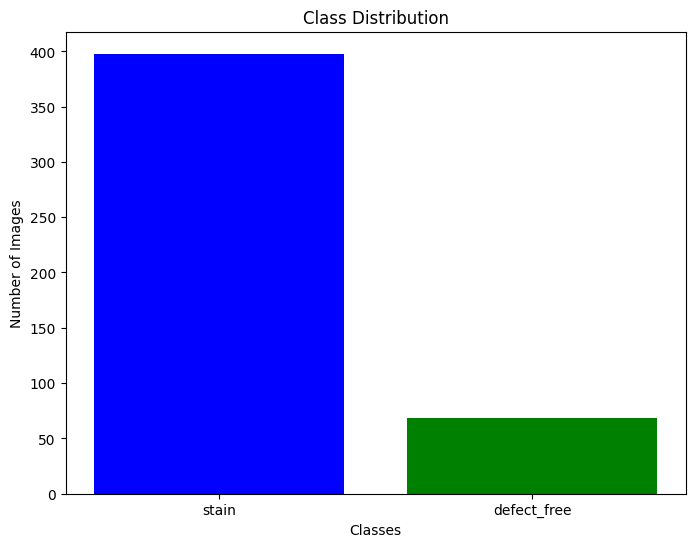

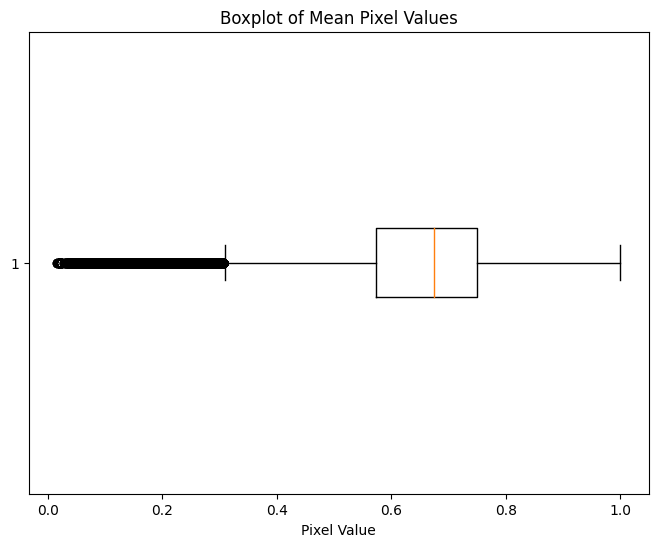

Silhouette Score: 0.019484647088504146


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np

dataset_dir = "/content/drive/My Drive/miniproject_daminda_sir/dataset/images"
categories = ["stain", "defect_free"]
image_size = (224, 224)

annotation_dir = os.path.join(dataset_dir, "annotation")
if os.path.exists(annotation_dir):
    for file in os.listdir(annotation_dir):
        os.remove(os.path.join(annotation_dir, file))
    os.rmdir(annotation_dir)
    print("Annotation folder and files removed successfully.")

## Data Exploration
images = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_dir, category)
    label = categories.index(category)
    for img_filename in os.listdir(category_path):
        try:
            img = cv2.imread(os.path.join(category_path, img_filename))
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
        except Exception as e:
            print("Error loading image:", e)

images = np.array(images)
labels = np.array(labels)

num_stain_images = np.sum(labels == 0)
num_defect_free_images = np.sum(labels == 1)
image_dimensions = images.shape[1:]

print("Number of stain images:", num_stain_images)
print("Number of defect-free images:", num_defect_free_images)
print("Image dimensions:", image_dimensions)

# Descriptive Analysis
mean_pixel_value = np.mean(images)#mean
std_pixel_value = np.std(images) #standerd deviation

print("Mean Pixel Value:", mean_pixel_value)
print("Standard Deviation of Pixel Value:", std_pixel_value)

class_distribution = {category: np.sum(labels == categories.index(category)) for category in categories}
print("Class Distribution:", class_distribution)

# 3: Data Preprocessing

# Cleaning (Already done by removing the "annotation" folder)

# Transformation
images = images / 255.0 #(value between 0-1)

# 4: Data Mining

# Predictive Analysis

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)    #x=images/ y=lables

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_dimensions), #rectified linear unit
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')   #(0 an 1) values
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5: Evaluation and Interpretation

# Results
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Visualize class distribution with a histogram
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

# Plot boxplots for mean pixel values
plt.figure(figsize=(8, 6))
plt.boxplot(images.reshape(-1), vert=False)
plt.title('Boxplot of Mean Pixel Values')
plt.xlabel('Pixel Value')
plt.show()

# Silhouette Analysis
silhouette_avg = silhouette_score(images.reshape(-1, np.prod(image_dimensions)), labels)
print("Silhouette Score:", silhouette_avg)
